In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from  IPython import display
import pathlib
import shutil
import tempfile
import sklearn.metrics

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import datasets, metrics, model_selection
from sklearn.metrics import roc_auc_score

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers.experimental import preprocessing
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

In [4]:
raw_dataset = pd.read_csv('path to datafile')
dataset_orig = raw_dataset.copy()
# dataset_orig.head()

dataset=dataset_orig[['Study','immune_subtype','HLA_A_log', 'HLA_B_log', 'HLA_C_log','HLA_E_log', 'HLA_G_log', 'B2M_log','HLA_DRA_log', 'HLA_DRB1_log', 'HLA_DQA1_log', 'HLA_DQB1_log', 'HLA_DPA1_log', 'HLA_DPB1_log', 'HLA_DMA_log', 'HLA_DMB_log', 'HLA_DOA_log', 'HLA_DOB_log']]
df_study = pd.get_dummies(dataset['Study'])
# print(df_study)
dataset = pd.concat([dataset, df_study], axis=1)

dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
dataset.isna().sum()
dataset = dataset.dropna()
dataset['immune_subtype']=dataset['immune_subtype'].astype('uint8')


In [5]:
# random sampling with the same fraction from each tumor type
ACC_df=dataset[dataset['Study']=='ACC']
ACC_train_dataset = ACC_df.sample(frac=0.6, random_state=0)
ACC_test_dataset = ACC_df.drop(ACC_train_dataset.index)

BLCA_df=dataset[dataset['Study']=='BLCA']
BLCA_train_dataset = BLCA_df.sample(frac=0.6, random_state=0)
BLCA_test_dataset = BLCA_df.drop(BLCA_train_dataset.index)

BRCA_df=dataset[dataset['Study']=='BRCA']
BRCA_train_dataset = BRCA_df.sample(frac=0.6, random_state=0)
BRCA_test_dataset = BRCA_df.drop(BRCA_train_dataset.index)

CESC_df=dataset[dataset['Study']=='CESC']
CESC_train_dataset = CESC_df.sample(frac=0.6, random_state=0)
CESC_test_dataset = CESC_df.drop(CESC_train_dataset.index)

CHOL_df=dataset[dataset['Study']=='CHOL']
CHOL_train_dataset = CHOL_df.sample(frac=0.6, random_state=0)
CHOL_test_dataset = CHOL_df.drop(CHOL_train_dataset.index)

COAD_df=dataset[dataset['Study']=='COAD']
COAD_train_dataset = COAD_df.sample(frac=0.6, random_state=0)
COAD_test_dataset = COAD_df.drop(COAD_train_dataset.index)

DLBC_df=dataset[dataset['Study']=='DLBC']
DLBC_train_dataset = DLBC_df.sample(frac=0.6, random_state=0)
DLBC_test_dataset = DLBC_df.drop(DLBC_train_dataset.index)

ESCA_df=dataset[dataset['Study']=='ESCA']
ESCA_train_dataset = ESCA_df.sample(frac=0.6, random_state=0)
ESCA_test_dataset = ESCA_df.drop(ESCA_train_dataset.index)

GBM_df=dataset[dataset['Study']=='GBM']
GBM_train_dataset = GBM_df.sample(frac=0.6, random_state=0)
GBM_test_dataset = GBM_df.drop(GBM_train_dataset.index)

HNSC_df=dataset[dataset['Study']=='HNSC']
HNSC_train_dataset = HNSC_df.sample(frac=0.6, random_state=0)
HNSC_test_dataset = HNSC_df.drop(HNSC_train_dataset.index)

KICH_df=dataset[dataset['Study']=='KICH']
KICH_train_dataset = KICH_df.sample(frac=0.6, random_state=0)
KICH_test_dataset = KICH_df.drop(KICH_train_dataset.index)

KIRC_df=dataset[dataset['Study']=='KIRC']
KIRC_train_dataset = KIRC_df.sample(frac=0.6, random_state=0)
KIRC_test_dataset = KIRC_df.drop(KIRC_train_dataset.index)

KIRP_df=dataset[dataset['Study']=='KIRP']
KIRP_train_dataset = KIRP_df.sample(frac=0.6, random_state=0)
KIRP_test_dataset = KIRP_df.drop(KIRP_train_dataset.index)

LGG_df=dataset[dataset['Study']=='LGG']
LGG_train_dataset = LGG_df.sample(frac=0.6, random_state=0)
LGG_test_dataset = LGG_df.drop(LGG_train_dataset.index)

LIHC_df=dataset[dataset['Study']=='LIHC']
LIHC_train_dataset = LIHC_df.sample(frac=0.6, random_state=0)
LIHC_test_dataset = LIHC_df.drop(LIHC_train_dataset.index)

LUAD_df=dataset[dataset['Study']=='LUAD']
LUAD_train_dataset = LUAD_df.sample(frac=0.6, random_state=0)
LUAD_test_dataset = LUAD_df.drop(LUAD_train_dataset.index)

LUSC_df=dataset[dataset['Study']=='LUSC']
LUSC_train_dataset = LUSC_df.sample(frac=0.6, random_state=0)
LUSC_test_dataset = LUSC_df.drop(LUSC_train_dataset.index)

MESO_df=dataset[dataset['Study']=='MESO']
MESO_train_dataset = MESO_df.sample(frac=0.6, random_state=0)
MESO_test_dataset = MESO_df.drop(MESO_train_dataset.index)

OV_df=dataset[dataset['Study']=='OV']
OV_train_dataset = OV_df.sample(frac=0.6, random_state=0)
OV_test_dataset = OV_df.drop(OV_train_dataset.index)

PAAD_df=dataset[dataset['Study']=='PAAD']
PAAD_train_dataset = PAAD_df.sample(frac=0.6, random_state=0)
PAAD_test_dataset = PAAD_df.drop(PAAD_train_dataset.index)

PCPG_df=dataset[dataset['Study']=='PCPG']
PCPG_train_dataset = PCPG_df.sample(frac=0.6, random_state=0)
PCPG_test_dataset = PCPG_df.drop(PCPG_train_dataset.index)

PRAD_df=dataset[dataset['Study']=='PRAD']
PRAD_train_dataset = PRAD_df.sample(frac=0.6, random_state=0)
PRAD_test_dataset = PRAD_df.drop(PRAD_train_dataset.index)


READ_df=dataset[dataset['Study']=='READ']
READ_train_dataset = READ_df.sample(frac=0.6, random_state=0)
READ_test_dataset = READ_df.drop(READ_train_dataset.index)

SARC_df=dataset[dataset['Study']=='SARC']
SARC_train_dataset = SARC_df.sample(frac=0.6, random_state=0)
SARC_test_dataset = SARC_df.drop(SARC_train_dataset.index)

SKCM_df=dataset[dataset['Study']=='SKCM']
SKCM_train_dataset = SKCM_df.sample(frac=0.6, random_state=0)
SKCM_test_dataset = SKCM_df.drop(SKCM_train_dataset.index)

STAD_df=dataset[dataset['Study']=='STAD']
STAD_train_dataset = STAD_df.sample(frac=0.6, random_state=0)
STAD_test_dataset = STAD_df.drop(STAD_train_dataset.index)

TGCT_df=dataset[dataset['Study']=='TGCT']
TGCT_train_dataset = TGCT_df.sample(frac=0.6, random_state=0)
TGCT_test_dataset = TGCT_df.drop(TGCT_train_dataset.index)

THCA_df=dataset[dataset['Study']=='THCA']
THCA_train_dataset = THCA_df.sample(frac=0.6, random_state=0)
THCA_test_dataset = THCA_df.drop(THCA_train_dataset.index)

THYM_df=dataset[dataset['Study']=='THYM']
THYM_train_dataset = THYM_df.sample(frac=0.6, random_state=0)
THYM_test_dataset = THYM_df.drop(THYM_train_dataset.index)

UCEC_df=dataset[dataset['Study']=='UCEC']
UCEC_train_dataset = UCEC_df.sample(frac=0.6, random_state=0)
UCEC_test_dataset = UCEC_df.drop(UCEC_train_dataset.index)

UCS_df=dataset[dataset['Study']=='UCS']
UCS_train_dataset = UCS_df.sample(frac=0.6, random_state=0)
UCS_test_dataset = UCS_df.drop(UCS_train_dataset.index)

UVM_df=dataset[dataset['Study']=='UVM']
UVM_train_dataset = UVM_df.sample(frac=0.6, random_state=0)
UVM_test_dataset = UVM_df.drop(UVM_train_dataset.index)

train_frames=[ACC_train_dataset,BLCA_train_dataset,BRCA_train_dataset,CESC_train_dataset,CHOL_train_dataset,COAD_train_dataset,DLBC_train_dataset,ESCA_train_dataset,GBM_train_dataset,HNSC_train_dataset,KICH_train_dataset,KIRC_train_dataset,KIRP_train_dataset,LGG_train_dataset,LIHC_train_dataset,LUAD_train_dataset,LUSC_train_dataset,MESO_train_dataset,OV_train_dataset,PAAD_train_dataset,PCPG_train_dataset,PRAD_train_dataset,READ_train_dataset,SARC_train_dataset,SKCM_train_dataset,STAD_train_dataset,TGCT_train_dataset,THCA_train_dataset,THYM_train_dataset,UCEC_train_dataset,UCS_train_dataset,UVM_train_dataset]
train_set=pd.concat(train_frames)
test_frames=[ACC_test_dataset,BLCA_test_dataset,BRCA_test_dataset,CESC_test_dataset,CHOL_test_dataset,COAD_test_dataset,DLBC_test_dataset,ESCA_test_dataset,GBM_test_dataset,HNSC_test_dataset,KICH_test_dataset,KIRC_test_dataset,KIRP_test_dataset,LGG_test_dataset,LIHC_test_dataset,LUAD_test_dataset,LUSC_test_dataset,MESO_test_dataset,OV_test_dataset,PAAD_test_dataset,PCPG_test_dataset,PRAD_test_dataset,READ_test_dataset,SARC_test_dataset,SKCM_test_dataset,STAD_test_dataset,TGCT_test_dataset,THCA_test_dataset,THYM_test_dataset,UCEC_test_dataset,UCS_test_dataset,UVM_test_dataset]
test_set=pd.concat(test_frames)

# exclude Study which is categorical
train_set.pop('Study')
test_set.pop('Study')

train_features = train_set.copy()
test_features = test_set.copy()

train_labels = train_features.pop('immune_subtype')
test_labels = test_features.pop('immune_subtype')

X_train=pd.DataFrame.to_numpy(train_features)
y_train=pd.Series.to_numpy(train_labels)

X_test=pd.DataFrame.to_numpy(test_features)
y_test=pd.Series.to_numpy(test_labels)

# classes: 0,1,2,3,4,5 to train the model
y_train = y_train-1
y_test = y_test-1

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(96, activation='tanh'),
    tf.keras.layers.Dense(6, activation='softmax') # returns a logits array with length 6
])

model.compile(optimizer = 'Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # minimize loss
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=40)

Epoch 1/40
169/169 [==============================] - 1s 717us/step - loss: 1.4016 - accuracy: 0.4061
Epoch 2/40
169/169 [==============================] - 0s 697us/step - loss: 0.9506 - accuracy: 0.6236
Epoch 3/40
169/169 [==============================] - 0s 636us/step - loss: 0.8421 - accuracy: 0.6765
Epoch 4/40
169/169 [==============================] - 0s 646us/step - loss: 0.8394 - accuracy: 0.6736
Epoch 5/40
169/169 [==============================] - 0s 643us/step - loss: 0.8022 - accuracy: 0.6802
Epoch 6/40
169/169 [==============================] - 0s 659us/step - loss: 0.7993 - accuracy: 0.6832
Epoch 7/40
169/169 [==============================] - 0s 636us/step - loss: 0.7998 - accuracy: 0.6880
Epoch 8/40
169/169 [==============================] - 0s 650us/step - loss: 0.7872 - accuracy: 0.6961
Epoch 9/40
169/169 [==============================] - 0s 660us/step - loss: 0.7860 - accuracy: 0.6838
Epoch 10/40
169/169 [==============================] - 0s 650us/step - loss: 0.802

In [7]:
# check for overfitting
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

113/113 - 0s - loss: 0.7891 - accuracy: 0.6942

Test accuracy: 0.6942125558853149


In [8]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [9]:
predictions = probability_model.predict(X_test)
# predictions = predictions[:,1:] # exclude the first dummy column
predictions

array([[0.135, 0.136, 0.165, 0.293, 0.135, 0.136],
       [0.14 , 0.137, 0.254, 0.195, 0.137, 0.137],
       [0.139, 0.138, 0.242, 0.207, 0.137, 0.138],
       ...,
       [0.133, 0.133, 0.145, 0.319, 0.138, 0.133],
       [0.132, 0.132, 0.14 , 0.33 , 0.134, 0.132],
       [0.136, 0.135, 0.288, 0.17 , 0.135, 0.136]], dtype=float32)

In [10]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Compute ROC curve and ROC area for each class
y_train_bin = label_binarize(y_train, classes=[0,1,2,3,4,5])
y_test_bin = label_binarize(y_test, classes=[0,1,2,3,4,5])
n_classes = y_train_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

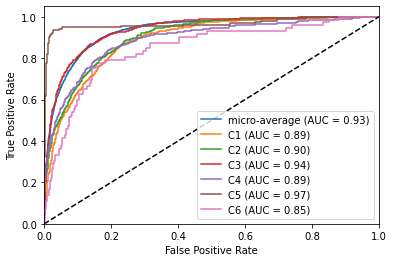

In [11]:
# Plot ROC curve: multiclass
fig=plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average (AUC = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='C{0} (AUC = {1:0.2f})'
                                   ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# fig.savefig('multiclass_tanh2-128-96-40epochs.png')